In [133]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [134]:
df = pd.read_csv('D:/dataset/fma-rock-vs-hiphop.csv')
pd.set_option('display.max_columns', None)
df.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]","[58, 12, 45]",NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]","[58, 12, 45]",NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],"[25, 12]",NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],"[25, 12]",NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],"[26, 12]",NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [135]:
df.columns

Index(['track_id', 'bit_rate', 'comments', 'composer', 'date_created',
       'date_recorded', 'duration', 'favorites', 'genre_top', 'genres',
       'genres_all', 'information', 'interest', 'language_code', 'license',
       'listens', 'lyricist', 'number', 'publisher', 'tags', 'title'],
      dtype='object')

In [136]:
df = df.drop(['comments', 'composer', 'date_recorded', 'information', 'lyricist', 'publisher', 'tags', 'language_code', 'license'], axis=1)
df

,track_id,bit_rate,date_created,duration,favorites,genre_top,genres,genres_all,interest,listens,number,title
0,135,256000,2008-11-26 01:43:26,837,0,Rock,"[45, 58]","[58, 12, 45]",2484,1832,0,Father's Day
1,136,256000,2008-11-26 01:43:35,509,0,Rock,"[45, 58]","[58, 12, 45]",1948,1498,0,Peel Back The Mountain Sky
2,151,192000,2008-11-26 01:44:55,192,0,Rock,[25],"[25, 12]",701,148,4,Untitled 04
3,152,192000,2008-11-26 01:44:58,193,0,Rock,[25],"[25, 12]",637,98,11,Untitled 11
4,153,256000,2008-11-26 01:45:00,405,5,Rock,[26],"[26, 12]",354,424,2,Hundred-Year Flood
...,...,...,...,...,...,...,...,...,...,...,...,...
17729,155063,320000,2017-03-24 19:40:43,283,3,Hip-Hop,"[21, 811]","[811, 21]",1283,1050,4,Been On
17730,155064,320000,2017-03-24 19:40:44,250,2,Hip-Hop,"[21, 811]","[811, 21]",1077,858,2,Send Me
17731,155065,320000,2017-03-24 19:40:45,219,3,Hip-Hop,"[21, 811]","[811, 21]",1340,1142,1,The Question
17732,155066,320000,2017-03-24 19:40:47,252,6,Hip-Hop,"[21, 811]","[811, 21]",2065,1474,3,Roy


In [137]:
df.isna().sum()

track_id        0
bit_rate        0
date_created    0
duration        0
favorites       0
genre_top       0
genres          0
genres_all      0
interest        0
listens         0
number          0
title           0
dtype: int64

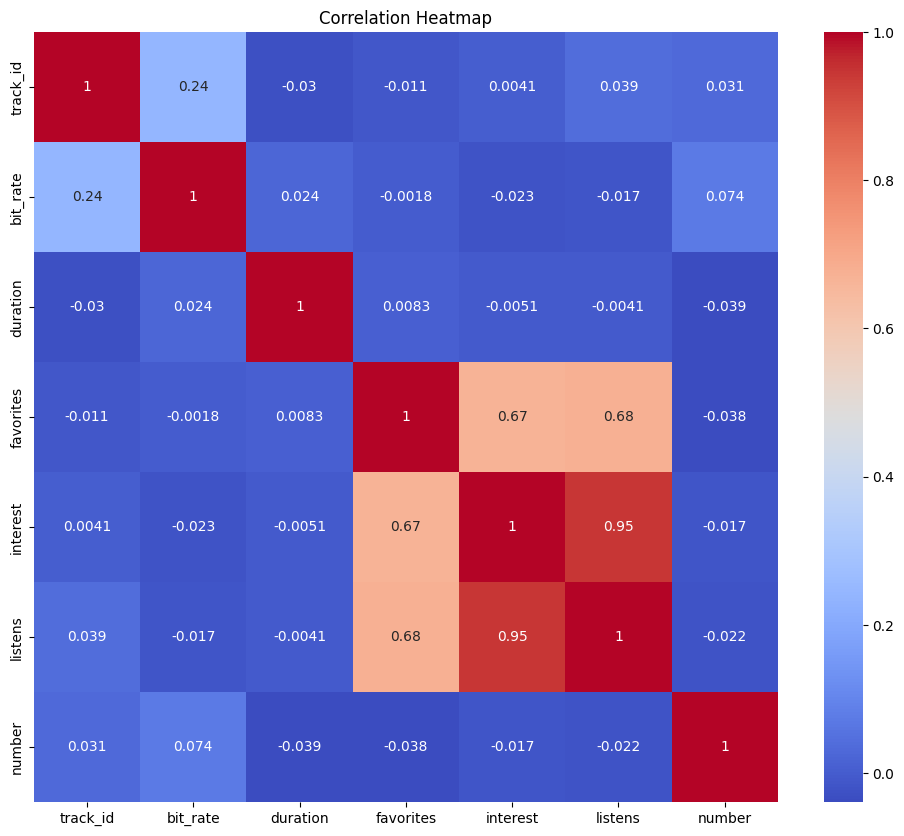

In [138]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

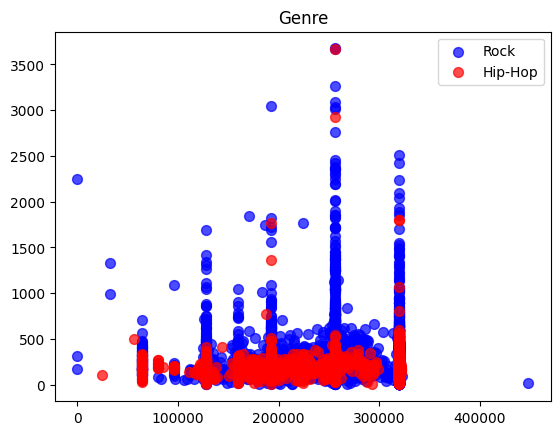

In [139]:
from sklearn.preprocessing import MultiLabelBinarizer

# Create a MultiLabelBinarizer object
mlb = MultiLabelBinarizer()

df['genres'] = df['genres'].apply(lambda x: [str(i) for i in x])
df['genres_all'] = df['genres_all'].apply(lambda x: [str(i) for i in x])

genres_encoded = mlb.fit_transform(df['genres'])
genres_all_encoded = mlb.fit_transform(df['genres_all'])

X = df[['bit_rate', 'duration', 'favorites', 'interest', 'listens', 'number']].values
X = np.hstack((X, genres_encoded, genres_all_encoded))

df_rock_hiphop = df[df['genre_top'].isin(['Rock', 'Hip-Hop'])]
y = np.where(df_rock_hiphop['genre_top'] == 'Rock', 1, 0)

rock_mask = y == 1
hiphop_mask = y == 0

plt.scatter(X[rock_mask, 0], X[rock_mask, 1], c='blue', s=50, label='Rock', alpha=0.7)
plt.scatter(X[hiphop_mask, 0], X[hiphop_mask, 1], c='red', s=50, label='Hip-Hop', alpha=0.7)
plt.legend()
plt.title("Genre") 
plt.show()

In [140]:
class SVM_soft_margin:
    def __init__(self, alpha=0.001, lambda_=0.01, n_iterations=1000):
        self.alpha = alpha  # learning rate
        self.lambda_ = lambda_  # tradeoff
        self.n_iterations = n_iterations  # number of iterations
        self.w = None  # weights or slopes
        self.b = None  # intercept

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)  # initializing with 0
        self.b = 0  # initialize with 0

        for iteration in range(self.n_iterations):
            for i, Xi in enumerate(X):
                # yixiw-b≥1
                if y[i] * (np.dot(Xi, self.w) - self.b) >= 1:
                    self.w -= self.alpha * (2 * self.lambda_ * self.w)  # w = w + α* (2λw - yixi)
                else:
                    self.w -= self.alpha * (2 * self.lambda_ * self.w - np.dot(Xi, y[i]))  # w = w + α* (2λw - yixi)
                    self.b -= self.alpha * y[i]  # b = b - α* (yi)

        return self.w, self.b

    def predict(self, X):
        pred = np.dot(X, self.w) - self.b
        result = [1 if val > 0 else -1 for val in pred]  # returning in the form of -1 and 1
        return result

    def get_hyperplane(self, x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    def plot_svm(self, X, y, w, b, title='Plot for linear SVM'):
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = self.get_hyperplane(x0_1, w, b, 0)
        x1_2 = self.get_hyperplane(x0_2, w, b, 0)

        x1_1_m = self.get_hyperplane(x0_1, w, b, -1)
        x1_2_m = self.get_hyperplane(x0_2, w, b, -1)

        x1_1_p = self.get_hyperplane(x0_1, w, b, 1)
        x1_2_p = self.get_hyperplane(x0_2, w, b, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], 'y--')
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], 'k')
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], 'k')

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])

        plt.title(title)
        plt.show()

For dataset 1, score: 0.7997067779406789


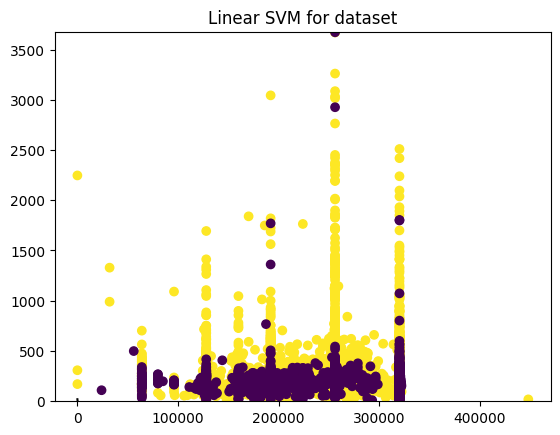

In [145]:
svm = SVM_soft_margin() 
w1, b1 = svm.fit(X, y) 
print("For dataset 1, score:", accuracy_score(svm.predict(X), y)) 
svm.plot_svm(X, y, w1, b1, title='Linear SVM for dataset')